# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [47]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [48]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [49]:
set(y)

{0, 1, 2}

In [50]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

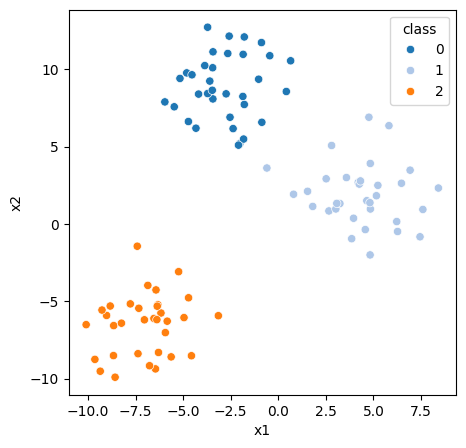

In [51]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [52]:
k = 3
n_samples, _=X.shape
idx = np.random.choice(n_samples, k, replace=True)
centroids = X[idx, :]
idx

array([12, 24, 40])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [53]:
from scipy.spatial.distance import cdist

distances = cdist(X, centroids)
distances[0:5]

array([[ 4.54144079, 22.85300627,  1.56816269],
       [13.41962233, 15.42250558, 17.92251014],
       [16.55858555,  2.2205457 , 19.84424392],
       [14.35807215, 16.39678198, 18.82950959],
       [ 0.62140797, 18.25719111,  4.58590915]])

## Step 3
Now assign each data point to the closest centroid

In [54]:
# Step 3
points = np.argmin(distances, axis=1)
points

array([2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [55]:
temp_centroids = []
for cluster in range(k):
    cluster_points = X[points == cluster]
    temp_cluster_centroid = np.mean(cluster_points, axis=0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)


# Step 5
Centroid change? Convergence

In [56]:
centroids, temp_centroids

(array([[-5.83574406, -6.28614025],
        [-2.5808497 , 12.14357344],
        [-9.63496593, -8.75575967]]),
 array([[-2.37366993, -3.52458927],
        [-0.16652978,  6.78567665],
        [-8.73795605, -7.88176172]]))

In [57]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [58]:
def kmeans(X, k):
    
    # Step 1
    k = 3
    n_samples, _=X.shape
    idx = np.random.choice(n_samples, k, replace=True)
    centroids = X[idx, :]
    idx
    
    while True:
        # Step 2
        from scipy.spatial.distance import cdist
        distances = cdist(X, centroids)
        distances[0:5]

        # Step 3
        points = np.argmin(distances, axis=1)
        points

        # Step 4
        temp_centroids = []
        for cluster in range(k):
            cluster_points = X[points == cluster]
            temp_cluster_centroid = np.mean(cluster_points, axis=0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [59]:
k = 2
points, centroids = kmeans(X, k)

In [60]:
centroids

array([[-7.96149238, -7.83346614],
       [ 0.71274196,  5.43283772],
       [-6.14125054, -5.19124864]])

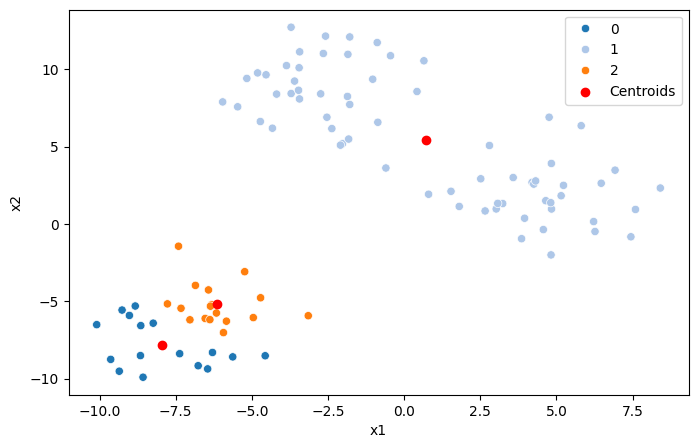

In [61]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [62]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [63]:
print("Points: ", kmeans.labels_)
print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Centroids:  [0.71274196 5.43283772]


In [64]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  2361.773515175247
Score:  -2361.7735151752468


In [65]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

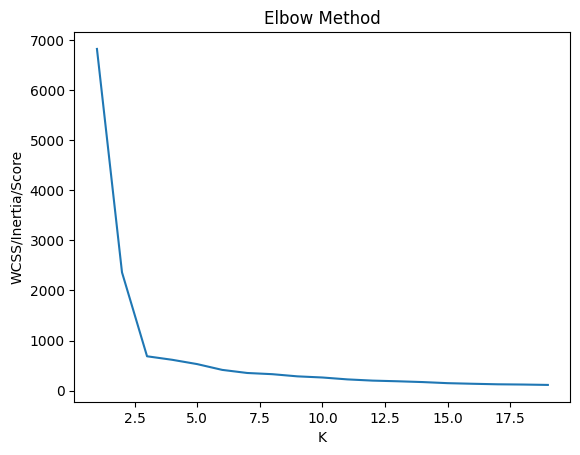

In [66]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()